In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam


Using TensorFlow backend.


In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)


11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)


In [3]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)


In [4]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [5]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [6]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [7]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  6%|▋         | 8/128 [00:00<00:01, 77.76it/s]

Epoch 2


  7%|▋         | 9/128 [00:00<00:01, 80.28it/s]

Epoch 3


  6%|▋         | 8/128 [00:00<00:01, 79.67it/s]

Epoch 4


  7%|▋         | 9/128 [00:00<00:01, 81.23it/s]

Epoch 5


  5%|▌         | 7/128 [00:00<00:01, 68.93it/s]

Epoch 6


  6%|▋         | 8/128 [00:00<00:01, 71.79it/s]

Epoch 7


  7%|▋         | 9/128 [00:00<00:01, 81.98it/s]

Epoch 8


  6%|▋         | 8/128 [00:00<00:01, 71.98it/s]

Epoch 9


  7%|▋         | 9/128 [00:00<00:01, 83.99it/s]

Epoch 10


  7%|▋         | 9/128 [00:00<00:01, 82.40it/s]

Epoch 11


  6%|▋         | 8/128 [00:00<00:01, 77.06it/s]

Epoch 12


  7%|▋         | 9/128 [00:00<00:01, 83.59it/s]

Epoch 13


  6%|▋         | 8/128 [00:00<00:01, 73.33it/s]

Epoch 14


  7%|▋         | 9/128 [00:00<00:01, 81.53it/s]

Epoch 15


  7%|▋         | 9/128 [00:00<00:01, 81.21it/s]

Epoch 16


  7%|▋         | 9/128 [00:00<00:01, 82.82it/s]

Epoch 17


  7%|▋         | 9/128 [00:00<00:01, 82.45it/s]

Epoch 18


  7%|▋         | 9/128 [00:00<00:01, 84.00it/s]

Epoch 19


  7%|▋         | 9/128 [00:00<00:01, 81.51it/s]

Epoch 20


  6%|▋         | 8/128 [00:00<00:01, 78.92it/s]

Epoch 21


  5%|▍         | 6/128 [00:00<00:02, 51.27it/s]

Epoch 22


  7%|▋         | 9/128 [00:00<00:01, 82.11it/s]

Epoch 23


  7%|▋         | 9/128 [00:00<00:01, 80.64it/s]

Epoch 24


  5%|▌         | 7/128 [00:00<00:02, 60.47it/s]

Epoch 25


  5%|▍         | 6/128 [00:00<00:02, 53.49it/s]

Epoch 26


  6%|▋         | 8/128 [00:00<00:01, 74.00it/s]

Epoch 27


  6%|▋         | 8/128 [00:00<00:01, 76.95it/s]

Epoch 28


  7%|▋         | 9/128 [00:00<00:01, 82.64it/s]

Epoch 29


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 30


  7%|▋         | 9/128 [00:00<00:01, 84.47it/s]

Epoch 31


  6%|▋         | 8/128 [00:00<00:01, 77.63it/s]

Epoch 32


  7%|▋         | 9/128 [00:00<00:01, 84.67it/s]

Epoch 33


  6%|▋         | 8/128 [00:00<00:01, 73.78it/s]

Epoch 34


  7%|▋         | 9/128 [00:00<00:01, 80.96it/s]

Epoch 35


  7%|▋         | 9/128 [00:00<00:01, 82.75it/s]

Epoch 36


  6%|▋         | 8/128 [00:00<00:01, 79.62it/s]

Epoch 37


  7%|▋         | 9/128 [00:00<00:01, 84.41it/s]

Epoch 38


  7%|▋         | 9/128 [00:00<00:01, 81.61it/s]

Epoch 39


  7%|▋         | 9/128 [00:00<00:01, 83.98it/s]

Epoch 40


  6%|▋         | 8/128 [00:00<00:01, 77.85it/s]

Epoch 41


  7%|▋         | 9/128 [00:00<00:01, 80.68it/s]

Epoch 42


  7%|▋         | 9/128 [00:00<00:01, 83.96it/s]

Epoch 43


  7%|▋         | 9/128 [00:00<00:01, 78.91it/s]

Epoch 44


  7%|▋         | 9/128 [00:00<00:01, 82.11it/s]

Epoch 45


  6%|▋         | 8/128 [00:00<00:01, 72.98it/s]

Epoch 46


  5%|▍         | 6/128 [00:00<00:02, 55.44it/s]

Epoch 47


  7%|▋         | 9/128 [00:00<00:01, 83.65it/s]

Epoch 48


  5%|▌         | 7/128 [00:00<00:01, 63.12it/s]

Epoch 49


  6%|▋         | 8/128 [00:00<00:01, 75.25it/s]

Epoch 50


  7%|▋         | 9/128 [00:00<00:01, 81.05it/s]

Epoch 51


  7%|▋         | 9/128 [00:00<00:01, 83.48it/s]

Epoch 52


  7%|▋         | 9/128 [00:00<00:01, 82.07it/s]

Epoch 53


  6%|▋         | 8/128 [00:00<00:01, 74.76it/s]

Epoch 54


  7%|▋         | 9/128 [00:00<00:01, 82.80it/s]

Epoch 55


  7%|▋         | 9/128 [00:00<00:01, 82.93it/s]

Epoch 56


  7%|▋         | 9/128 [00:00<00:01, 68.19it/s]

Epoch 57


  7%|▋         | 9/128 [00:00<00:01, 82.64it/s]

Epoch 58


  5%|▌         | 7/128 [00:00<00:01, 68.45it/s]

Epoch 59


  7%|▋         | 9/128 [00:00<00:01, 84.66it/s]

Epoch 60


  7%|▋         | 9/128 [00:00<00:01, 82.00it/s]

Epoch 61


  7%|▋         | 9/128 [00:00<00:01, 81.54it/s]

Epoch 62


  7%|▋         | 9/128 [00:00<00:01, 81.76it/s]

Epoch 63


  7%|▋         | 9/128 [00:00<00:01, 82.75it/s]

Epoch 64


  7%|▋         | 9/128 [00:00<00:01, 81.41it/s]

Epoch 65


  6%|▋         | 8/128 [00:00<00:01, 79.35it/s]

Epoch 66


  7%|▋         | 9/128 [00:00<00:01, 84.55it/s]

Epoch 67


  6%|▋         | 8/128 [00:00<00:01, 72.04it/s]

Epoch 68


  7%|▋         | 9/128 [00:00<00:01, 77.61it/s]

Epoch 69


  7%|▋         | 9/128 [00:00<00:01, 82.63it/s]

Epoch 70


  6%|▋         | 8/128 [00:00<00:01, 72.65it/s]

Epoch 71


  5%|▍         | 6/128 [00:00<00:02, 52.79it/s]

Epoch 72


  7%|▋         | 9/128 [00:00<00:01, 81.69it/s]

Epoch 73


  7%|▋         | 9/128 [00:00<00:01, 81.02it/s]

Epoch 74


  7%|▋         | 9/128 [00:00<00:01, 80.16it/s]

Epoch 75


  7%|▋         | 9/128 [00:00<00:01, 81.33it/s]

Epoch 76


  6%|▋         | 8/128 [00:00<00:01, 74.49it/s]

Epoch 77


  7%|▋         | 9/128 [00:00<00:01, 84.84it/s]

Epoch 78


  6%|▋         | 8/128 [00:00<00:01, 71.41it/s]

Epoch 79


  6%|▋         | 8/128 [00:00<00:01, 76.74it/s]

Epoch 80


  6%|▋         | 8/128 [00:00<00:01, 70.72it/s]

Epoch 81


  7%|▋         | 9/128 [00:00<00:01, 82.57it/s]

Epoch 82


  7%|▋         | 9/128 [00:00<00:01, 82.36it/s]

Epoch 83


  7%|▋         | 9/128 [00:00<00:01, 82.63it/s]

Epoch 84


  6%|▋         | 8/128 [00:00<00:01, 77.69it/s]

Epoch 85


  7%|▋         | 9/128 [00:00<00:01, 82.58it/s]

Epoch 86


  7%|▋         | 9/128 [00:00<00:01, 81.66it/s]

Epoch 87


  7%|▋         | 9/128 [00:00<00:01, 81.32it/s]

Epoch 88


  6%|▋         | 8/128 [00:00<00:01, 79.84it/s]

Epoch 89


  5%|▍         | 6/128 [00:00<00:02, 58.19it/s]

Epoch 90


  7%|▋         | 9/128 [00:00<00:01, 78.10it/s]

Epoch 91


  6%|▋         | 8/128 [00:00<00:01, 75.15it/s]

Epoch 92


  7%|▋         | 9/128 [00:00<00:01, 82.80it/s]

Epoch 93


  7%|▋         | 9/128 [00:00<00:01, 81.60it/s]

Epoch 94


  5%|▌         | 7/128 [00:00<00:01, 69.57it/s]

Epoch 95


  7%|▋         | 9/128 [00:00<00:01, 81.60it/s]

Epoch 96


  7%|▋         | 9/128 [00:00<00:01, 82.35it/s]

Epoch 97


  7%|▋         | 9/128 [00:00<00:01, 81.54it/s]

Epoch 98


  7%|▋         | 9/128 [00:00<00:01, 80.63it/s]

Epoch 99


  7%|▋         | 9/128 [00:00<00:01, 82.03it/s]

Epoch 100


  6%|▋         | 8/128 [00:00<00:01, 77.20it/s]

Epoch 101


  7%|▋         | 9/128 [00:00<00:01, 84.21it/s]

Epoch 102


  7%|▋         | 9/128 [00:00<00:01, 80.88it/s]

Epoch 103


  6%|▋         | 8/128 [00:00<00:01, 79.16it/s]

Epoch 104


  6%|▋         | 8/128 [00:00<00:01, 74.46it/s]

Epoch 105


  5%|▌         | 7/128 [00:00<00:01, 68.25it/s]

Epoch 106


  5%|▌         | 7/128 [00:00<00:01, 69.64it/s]

Epoch 107


  6%|▋         | 8/128 [00:00<00:01, 77.39it/s]

Epoch 108


  7%|▋         | 9/128 [00:00<00:01, 81.10it/s]

Epoch 109


  7%|▋         | 9/128 [00:00<00:01, 81.21it/s]

Epoch 110


  6%|▋         | 8/128 [00:00<00:01, 73.83it/s]

Epoch 111


  5%|▍         | 6/128 [00:00<00:02, 52.64it/s]

Epoch 112


  7%|▋         | 9/128 [00:00<00:01, 81.94it/s]

Epoch 113


  7%|▋         | 9/128 [00:00<00:01, 84.10it/s]

Epoch 114


  7%|▋         | 9/128 [00:00<00:01, 82.36it/s]

Epoch 115


  7%|▋         | 9/128 [00:00<00:01, 80.30it/s]

Epoch 116


  7%|▋         | 9/128 [00:00<00:01, 80.82it/s]

Epoch 117


  5%|▌         | 7/128 [00:00<00:01, 66.84it/s]

Epoch 118


  7%|▋         | 9/128 [00:00<00:01, 82.71it/s]

Epoch 119


  5%|▍         | 6/128 [00:00<00:02, 53.15it/s]

Epoch 120


  6%|▋         | 8/128 [00:00<00:01, 79.67it/s]

Epoch 121


  6%|▋         | 8/128 [00:00<00:01, 69.66it/s]

Epoch 122


  7%|▋         | 9/128 [00:00<00:01, 83.51it/s]

Epoch 123


  7%|▋         | 9/128 [00:00<00:01, 82.87it/s]

Epoch 124


  7%|▋         | 9/128 [00:00<00:01, 82.16it/s]

Epoch 125


  5%|▌         | 7/128 [00:00<00:01, 68.93it/s]

Epoch 126


  7%|▋         | 9/128 [00:00<00:01, 82.41it/s]

Epoch 127


  7%|▋         | 9/128 [00:00<00:01, 84.08it/s]

Epoch 128


  7%|▋         | 9/128 [00:00<00:01, 84.22it/s]

Epoch 129


  7%|▋         | 9/128 [00:00<00:01, 82.46it/s]

Epoch 130


  7%|▋         | 9/128 [00:00<00:01, 81.57it/s]

Epoch 131


  7%|▋         | 9/128 [00:00<00:01, 81.77it/s]

Epoch 132


  7%|▋         | 9/128 [00:00<00:01, 80.00it/s]

Epoch 133


  7%|▋         | 9/128 [00:00<00:01, 82.07it/s]

Epoch 134


  7%|▋         | 9/128 [00:00<00:01, 84.12it/s]

Epoch 135


  7%|▋         | 9/128 [00:00<00:01, 77.46it/s]

Epoch 136


  7%|▋         | 9/128 [00:00<00:01, 81.80it/s]

Epoch 137


  7%|▋         | 9/128 [00:00<00:01, 81.24it/s]

Epoch 138


  4%|▍         | 5/128 [00:00<00:02, 45.22it/s]

Epoch 139


  6%|▋         | 8/128 [00:00<00:01, 79.91it/s]

Epoch 140


  7%|▋         | 9/128 [00:00<00:01, 81.67it/s]

Epoch 141


  7%|▋         | 9/128 [00:00<00:01, 81.17it/s]

Epoch 142


  6%|▋         | 8/128 [00:00<00:01, 74.59it/s]

Epoch 143


  7%|▋         | 9/128 [00:00<00:01, 82.21it/s]

Epoch 144


  7%|▋         | 9/128 [00:00<00:01, 82.98it/s]

Epoch 145


  7%|▋         | 9/128 [00:00<00:01, 83.26it/s]

Epoch 146


  7%|▋         | 9/128 [00:00<00:01, 82.31it/s]

Epoch 147


  7%|▋         | 9/128 [00:00<00:01, 82.03it/s]

Epoch 148


  6%|▋         | 8/128 [00:00<00:01, 75.85it/s]

Epoch 149


  7%|▋         | 9/128 [00:00<00:01, 81.75it/s]

Epoch 150


  7%|▋         | 9/128 [00:00<00:01, 82.67it/s]

Epoch 151


  4%|▍         | 5/128 [00:00<00:02, 49.77it/s]

Epoch 152


  7%|▋         | 9/128 [00:00<00:01, 80.15it/s]

Epoch 153


  7%|▋         | 9/128 [00:00<00:01, 80.17it/s]

Epoch 154


  7%|▋         | 9/128 [00:00<00:01, 81.22it/s]

Epoch 155


  7%|▋         | 9/128 [00:00<00:01, 80.94it/s]

Epoch 156


  7%|▋         | 9/128 [00:00<00:01, 82.83it/s]

Epoch 157


  5%|▌         | 7/128 [00:00<00:01, 66.67it/s]

Epoch 158


  7%|▋         | 9/128 [00:00<00:01, 85.72it/s]

Epoch 159


  7%|▋         | 9/128 [00:00<00:01, 84.35it/s]

Epoch 160


  7%|▋         | 9/128 [00:00<00:01, 81.62it/s]

Epoch 161


  6%|▋         | 8/128 [00:00<00:01, 73.35it/s]

Epoch 162


  7%|▋         | 9/128 [00:00<00:01, 83.36it/s]

Epoch 163


  6%|▋         | 8/128 [00:00<00:01, 71.64it/s]

Epoch 164


  7%|▋         | 9/128 [00:00<00:01, 81.71it/s]

Epoch 165


  6%|▋         | 8/128 [00:00<00:01, 72.14it/s]

Epoch 166


  7%|▋         | 9/128 [00:00<00:01, 83.10it/s]

Epoch 167


  7%|▋         | 9/128 [00:00<00:01, 83.27it/s]

Epoch 168


  7%|▋         | 9/128 [00:00<00:01, 80.93it/s]

Epoch 169


  7%|▋         | 9/128 [00:00<00:01, 84.12it/s]

Epoch 170


  7%|▋         | 9/128 [00:00<00:01, 80.33it/s]

Epoch 171


  7%|▋         | 9/128 [00:00<00:01, 83.61it/s]

Epoch 172


  6%|▋         | 8/128 [00:00<00:01, 79.51it/s]

Epoch 173


  7%|▋         | 9/128 [00:00<00:01, 83.00it/s]

Epoch 174


  6%|▋         | 8/128 [00:00<00:01, 71.37it/s]

Epoch 175


  7%|▋         | 9/128 [00:00<00:01, 81.94it/s]

Epoch 176


  7%|▋         | 9/128 [00:00<00:01, 79.33it/s]

Epoch 177


  7%|▋         | 9/128 [00:00<00:01, 82.93it/s]

Epoch 178


  7%|▋         | 9/128 [00:00<00:01, 82.34it/s]

Epoch 179


  7%|▋         | 9/128 [00:00<00:01, 81.09it/s]

Epoch 180


  6%|▋         | 8/128 [00:00<00:01, 77.98it/s]

Epoch 181


  7%|▋         | 9/128 [00:00<00:01, 83.59it/s]

Epoch 182


  7%|▋         | 9/128 [00:00<00:01, 82.00it/s]

Epoch 183


  6%|▋         | 8/128 [00:00<00:01, 76.30it/s]

Epoch 184


  7%|▋         | 9/128 [00:00<00:01, 84.36it/s]

Epoch 185


  6%|▋         | 8/128 [00:00<00:01, 79.99it/s]

Epoch 186


  6%|▋         | 8/128 [00:00<00:01, 79.67it/s]

Epoch 187


  7%|▋         | 9/128 [00:00<00:01, 84.74it/s]

Epoch 188


  6%|▋         | 8/128 [00:00<00:01, 78.80it/s]

Epoch 189


  5%|▌         | 7/128 [00:00<00:01, 67.02it/s]

Epoch 190


  7%|▋         | 9/128 [00:00<00:01, 83.41it/s]

Epoch 191


  3%|▎         | 4/128 [00:00<00:03, 37.43it/s]

Epoch 192


  7%|▋         | 9/128 [00:00<00:01, 83.29it/s]

Epoch 193


  7%|▋         | 9/128 [00:00<00:01, 81.93it/s]

Epoch 194


  7%|▋         | 9/128 [00:00<00:01, 82.96it/s]

Epoch 195


  6%|▋         | 8/128 [00:00<00:01, 77.42it/s]

Epoch 196


  5%|▌         | 7/128 [00:00<00:01, 65.40it/s]

Epoch 197


  6%|▋         | 8/128 [00:00<00:01, 74.53it/s]

Epoch 198


  7%|▋         | 9/128 [00:00<00:01, 83.96it/s]

Epoch 199


  7%|▋         | 9/128 [00:00<00:01, 83.63it/s]

Epoch 200


  6%|▋         | 8/128 [00:00<00:01, 76.00it/s]

Epoch 201


  7%|▋         | 9/128 [00:00<00:01, 80.56it/s]

Epoch 202


  6%|▋         | 8/128 [00:00<00:01, 75.00it/s]

Epoch 203


  6%|▋         | 8/128 [00:00<00:01, 71.50it/s]

Epoch 204


  7%|▋         | 9/128 [00:00<00:01, 82.27it/s]

Epoch 205


  7%|▋         | 9/128 [00:00<00:01, 80.27it/s]

Epoch 206


  7%|▋         | 9/128 [00:00<00:01, 82.42it/s]

Epoch 207


  7%|▋         | 9/128 [00:00<00:01, 83.91it/s]

Epoch 208


  7%|▋         | 9/128 [00:00<00:01, 83.53it/s]

Epoch 209


  5%|▌         | 7/128 [00:00<00:01, 66.43it/s]

Epoch 210


  7%|▋         | 9/128 [00:00<00:01, 82.09it/s]

Epoch 211


  6%|▋         | 8/128 [00:00<00:01, 77.87it/s]

Epoch 212


  7%|▋         | 9/128 [00:00<00:01, 83.85it/s]

Epoch 213


  6%|▋         | 8/128 [00:00<00:01, 76.21it/s]

Epoch 214


  7%|▋         | 9/128 [00:00<00:01, 82.59it/s]

Epoch 215


  4%|▍         | 5/128 [00:00<00:02, 49.17it/s]

Epoch 216


  7%|▋         | 9/128 [00:00<00:01, 81.67it/s]

Epoch 217


  7%|▋         | 9/128 [00:00<00:01, 80.94it/s]

Epoch 218


  4%|▍         | 5/128 [00:00<00:02, 45.68it/s]

Epoch 219


  5%|▍         | 6/128 [00:00<00:02, 56.18it/s]

Epoch 220


  6%|▋         | 8/128 [00:00<00:01, 79.95it/s]

Epoch 221


  7%|▋         | 9/128 [00:00<00:01, 82.36it/s]

Epoch 222


  6%|▋         | 8/128 [00:00<00:01, 77.75it/s]

Epoch 223


  7%|▋         | 9/128 [00:00<00:01, 82.16it/s]

Epoch 224


  7%|▋         | 9/128 [00:00<00:01, 83.34it/s]

Epoch 225


  7%|▋         | 9/128 [00:00<00:01, 79.96it/s]

Epoch 226


  7%|▋         | 9/128 [00:00<00:01, 83.91it/s]

Epoch 227


  7%|▋         | 9/128 [00:00<00:01, 84.03it/s]

Epoch 228


  7%|▋         | 9/128 [00:00<00:01, 80.62it/s]

Epoch 229


  7%|▋         | 9/128 [00:00<00:01, 82.23it/s]

Epoch 230


  6%|▋         | 8/128 [00:00<00:01, 73.16it/s]

Epoch 231


  7%|▋         | 9/128 [00:00<00:01, 84.73it/s]

Epoch 232


  7%|▋         | 9/128 [00:00<00:01, 84.12it/s]

Epoch 233


  7%|▋         | 9/128 [00:00<00:01, 83.11it/s]

Epoch 234


  6%|▋         | 8/128 [00:00<00:01, 79.49it/s]

Epoch 235


  7%|▋         | 9/128 [00:00<00:01, 84.37it/s]

Epoch 236


  7%|▋         | 9/128 [00:00<00:01, 82.22it/s]

Epoch 237


  7%|▋         | 9/128 [00:00<00:01, 81.07it/s]

Epoch 238


  7%|▋         | 9/128 [00:00<00:01, 83.96it/s]

Epoch 239


  6%|▋         | 8/128 [00:00<00:01, 78.37it/s]

Epoch 240


  5%|▌         | 7/128 [00:00<00:01, 69.79it/s]

Epoch 241


  7%|▋         | 9/128 [00:00<00:01, 82.46it/s]

Epoch 242


  7%|▋         | 9/128 [00:00<00:01, 83.05it/s]

Epoch 243


  7%|▋         | 9/128 [00:00<00:01, 83.91it/s]

Epoch 244


  7%|▋         | 9/128 [00:00<00:01, 84.26it/s]

Epoch 245


  6%|▋         | 8/128 [00:00<00:01, 79.91it/s]

Epoch 246


  6%|▋         | 8/128 [00:00<00:01, 71.37it/s]

Epoch 247


  7%|▋         | 9/128 [00:00<00:01, 83.93it/s]

Epoch 248


  7%|▋         | 9/128 [00:00<00:01, 81.41it/s]

Epoch 249


  7%|▋         | 9/128 [00:00<00:01, 81.10it/s]

Epoch 250


  7%|▋         | 9/128 [00:00<00:01, 83.67it/s]

Epoch 251


  7%|▋         | 9/128 [00:00<00:01, 81.76it/s]

Epoch 252


  7%|▋         | 9/128 [00:00<00:01, 83.94it/s]

Epoch 253


  7%|▋         | 9/128 [00:00<00:01, 83.77it/s]

Epoch 254


  7%|▋         | 9/128 [00:00<00:01, 81.18it/s]

Epoch 255


  6%|▋         | 8/128 [00:00<00:01, 72.31it/s]

Epoch 256


  5%|▌         | 7/128 [00:00<00:01, 61.89it/s]

Epoch 257


  7%|▋         | 9/128 [00:00<00:01, 81.59it/s]

Epoch 258


  7%|▋         | 9/128 [00:00<00:01, 83.47it/s]

Epoch 259


  7%|▋         | 9/128 [00:00<00:01, 81.91it/s]

Epoch 260


  6%|▋         | 8/128 [00:00<00:01, 75.67it/s]

Epoch 261


  7%|▋         | 9/128 [00:00<00:01, 81.37it/s]

Epoch 262


  7%|▋         | 9/128 [00:00<00:01, 83.91it/s]

Epoch 263


  7%|▋         | 9/128 [00:00<00:01, 84.36it/s]

Epoch 264


  7%|▋         | 9/128 [00:00<00:01, 83.30it/s]

Epoch 265


  7%|▋         | 9/128 [00:00<00:01, 78.38it/s]

Epoch 266


  7%|▋         | 9/128 [00:00<00:01, 83.47it/s]

Epoch 267


  6%|▋         | 8/128 [00:00<00:01, 73.34it/s]

Epoch 268


  6%|▋         | 8/128 [00:00<00:01, 79.98it/s]

Epoch 269


  7%|▋         | 9/128 [00:00<00:01, 81.83it/s]

Epoch 270


  6%|▋         | 8/128 [00:00<00:01, 79.80it/s]

Epoch 271


  7%|▋         | 9/128 [00:00<00:01, 84.45it/s]

Epoch 272


  6%|▋         | 8/128 [00:00<00:01, 77.78it/s]

Epoch 273


  5%|▌         | 7/128 [00:00<00:01, 69.65it/s]

Epoch 274


  7%|▋         | 9/128 [00:00<00:01, 81.02it/s]

Epoch 275


  7%|▋         | 9/128 [00:00<00:01, 82.33it/s]

Epoch 276


  7%|▋         | 9/128 [00:00<00:01, 81.92it/s]

Epoch 277


  7%|▋         | 9/128 [00:00<00:01, 82.23it/s]

Epoch 278


  7%|▋         | 9/128 [00:00<00:01, 81.12it/s]

Epoch 279


  6%|▋         | 8/128 [00:00<00:01, 77.08it/s]

Epoch 280


  7%|▋         | 9/128 [00:00<00:01, 81.51it/s]

Epoch 281


  5%|▌         | 7/128 [00:00<00:01, 62.94it/s]

Epoch 282


  6%|▋         | 8/128 [00:00<00:01, 73.25it/s]

Epoch 283


  7%|▋         | 9/128 [00:00<00:01, 80.58it/s]

Epoch 284


  7%|▋         | 9/128 [00:00<00:01, 82.74it/s]

Epoch 285


  7%|▋         | 9/128 [00:00<00:01, 82.80it/s]

Epoch 286


  6%|▋         | 8/128 [00:00<00:01, 77.75it/s]

Epoch 287


  7%|▋         | 9/128 [00:00<00:01, 83.82it/s]

Epoch 288


  7%|▋         | 9/128 [00:00<00:01, 85.33it/s]

Epoch 289


  5%|▌         | 7/128 [00:00<00:01, 65.67it/s]

Epoch 290


  7%|▋         | 9/128 [00:00<00:01, 83.01it/s]

Epoch 291


  6%|▋         | 8/128 [00:00<00:01, 72.27it/s]

Epoch 292


  7%|▋         | 9/128 [00:00<00:01, 82.34it/s]

Epoch 293


  6%|▋         | 8/128 [00:00<00:01, 77.93it/s]

Epoch 294


  7%|▋         | 9/128 [00:00<00:01, 83.62it/s]

Epoch 295


  6%|▋         | 8/128 [00:00<00:01, 74.36it/s]

Epoch 296


  7%|▋         | 9/128 [00:00<00:01, 81.86it/s]

Epoch 297


  7%|▋         | 9/128 [00:00<00:01, 82.46it/s]

Epoch 298


  6%|▋         | 8/128 [00:00<00:01, 75.88it/s]

Epoch 299


  7%|▋         | 9/128 [00:00<00:01, 85.29it/s]

Epoch 300


  6%|▋         | 8/128 [00:00<00:01, 78.24it/s]

Epoch 301


  7%|▋         | 9/128 [00:00<00:01, 81.73it/s]

Epoch 302


  6%|▋         | 8/128 [00:00<00:01, 71.11it/s]

Epoch 303


  5%|▍         | 6/128 [00:00<00:02, 58.63it/s]

Epoch 304


  7%|▋         | 9/128 [00:00<00:01, 81.76it/s]

Epoch 305


  6%|▋         | 8/128 [00:00<00:01, 75.98it/s]

Epoch 306


  6%|▋         | 8/128 [00:00<00:01, 74.91it/s]

Epoch 307


  7%|▋         | 9/128 [00:00<00:01, 82.30it/s]

Epoch 308


  7%|▋         | 9/128 [00:00<00:01, 75.21it/s]

Epoch 309


  7%|▋         | 9/128 [00:00<00:01, 80.31it/s]

Epoch 310


  7%|▋         | 9/128 [00:00<00:01, 85.03it/s]

Epoch 311


  7%|▋         | 9/128 [00:00<00:02, 53.45it/s]

Epoch 312


  2%|▏         | 3/128 [00:00<00:05, 21.92it/s]

Epoch 313


  6%|▋         | 8/128 [00:00<00:01, 69.84it/s]

Epoch 314


  7%|▋         | 9/128 [00:00<00:01, 81.18it/s]

Epoch 315


  5%|▍         | 6/128 [00:00<00:02, 55.10it/s]

Epoch 316


  6%|▋         | 8/128 [00:00<00:01, 73.57it/s]

Epoch 317


  7%|▋         | 9/128 [00:00<00:01, 81.59it/s]

Epoch 318


  7%|▋         | 9/128 [00:00<00:01, 82.05it/s]

Epoch 319


  7%|▋         | 9/128 [00:00<00:01, 85.26it/s]

Epoch 320


  6%|▋         | 8/128 [00:00<00:01, 78.71it/s]

Epoch 321


  6%|▋         | 8/128 [00:00<00:01, 74.29it/s]

Epoch 322


  7%|▋         | 9/128 [00:00<00:01, 83.71it/s]

Epoch 323


  7%|▋         | 9/128 [00:00<00:01, 81.09it/s]

Epoch 324


  7%|▋         | 9/128 [00:00<00:01, 84.73it/s]

Epoch 325


  6%|▋         | 8/128 [00:00<00:01, 73.52it/s]

Epoch 326


  7%|▋         | 9/128 [00:00<00:01, 82.82it/s]

Epoch 327


  7%|▋         | 9/128 [00:00<00:01, 84.02it/s]

Epoch 328


  7%|▋         | 9/128 [00:00<00:01, 81.81it/s]

Epoch 329


  7%|▋         | 9/128 [00:00<00:01, 84.29it/s]

Epoch 330


  7%|▋         | 9/128 [00:00<00:01, 84.39it/s]

Epoch 331


  7%|▋         | 9/128 [00:00<00:01, 83.57it/s]

Epoch 332


  6%|▋         | 8/128 [00:00<00:01, 74.95it/s]

Epoch 333


  7%|▋         | 9/128 [00:00<00:01, 81.80it/s]

Epoch 334


  6%|▋         | 8/128 [00:00<00:01, 77.04it/s]

Epoch 335


  7%|▋         | 9/128 [00:00<00:01, 85.82it/s]

Epoch 336


  6%|▋         | 8/128 [00:00<00:01, 73.94it/s]

Epoch 337


  7%|▋         | 9/128 [00:00<00:01, 83.87it/s]

Epoch 338


  7%|▋         | 9/128 [00:00<00:01, 85.37it/s]

Epoch 339


  7%|▋         | 9/128 [00:00<00:01, 81.77it/s]

Epoch 340


  6%|▋         | 8/128 [00:00<00:01, 79.99it/s]

Epoch 341


  4%|▍         | 5/128 [00:00<00:02, 47.83it/s]

Epoch 342


  6%|▋         | 8/128 [00:00<00:01, 79.06it/s]

Epoch 343


  5%|▍         | 6/128 [00:00<00:02, 51.67it/s]

Epoch 344


  7%|▋         | 9/128 [00:00<00:01, 82.58it/s]

Epoch 345


  7%|▋         | 9/128 [00:00<00:01, 81.78it/s]

Epoch 346


  2%|▏         | 3/128 [00:00<00:04, 25.32it/s]

Epoch 347


  7%|▋         | 9/128 [00:00<00:01, 82.41it/s]

Epoch 348


  6%|▋         | 8/128 [00:00<00:01, 77.92it/s]

Epoch 349


  6%|▋         | 8/128 [00:00<00:01, 79.83it/s]

Epoch 350


  7%|▋         | 9/128 [00:00<00:01, 80.98it/s]

Epoch 351


  6%|▋         | 8/128 [00:00<00:01, 74.04it/s]

Epoch 352


  6%|▋         | 8/128 [00:00<00:01, 64.20it/s]

Epoch 353


  7%|▋         | 9/128 [00:00<00:01, 84.08it/s]

Epoch 354


  7%|▋         | 9/128 [00:00<00:01, 80.42it/s]

Epoch 355


  7%|▋         | 9/128 [00:00<00:01, 85.62it/s]

Epoch 356


  7%|▋         | 9/128 [00:00<00:01, 81.43it/s]

Epoch 357


  7%|▋         | 9/128 [00:00<00:01, 82.24it/s]

Epoch 358


  5%|▌         | 7/128 [00:00<00:01, 67.05it/s]

Epoch 359


  7%|▋         | 9/128 [00:00<00:01, 82.85it/s]

Epoch 360


  7%|▋         | 9/128 [00:00<00:01, 80.52it/s]

Epoch 361


  6%|▋         | 8/128 [00:00<00:01, 77.59it/s]

Epoch 362


  7%|▋         | 9/128 [00:00<00:01, 81.84it/s]

Epoch 363


  7%|▋         | 9/128 [00:00<00:01, 80.47it/s]

Epoch 364


  6%|▋         | 8/128 [00:00<00:01, 79.52it/s]

Epoch 365


  5%|▌         | 7/128 [00:00<00:01, 67.74it/s]

Epoch 366


  7%|▋         | 9/128 [00:00<00:01, 85.30it/s]

Epoch 367


  5%|▌         | 7/128 [00:00<00:01, 66.92it/s]

Epoch 368


  3%|▎         | 4/128 [00:00<00:03, 39.02it/s]

Epoch 369


  7%|▋         | 9/128 [00:00<00:01, 82.70it/s]

Epoch 370


  7%|▋         | 9/128 [00:00<00:01, 80.76it/s]

Epoch 371


  7%|▋         | 9/128 [00:00<00:01, 82.38it/s]

Epoch 372


  6%|▋         | 8/128 [00:00<00:01, 77.77it/s]

Epoch 373


  7%|▋         | 9/128 [00:00<00:01, 83.10it/s]

Epoch 374


  6%|▋         | 8/128 [00:00<00:01, 75.37it/s]

Epoch 375


  7%|▋         | 9/128 [00:00<00:01, 80.69it/s]

Epoch 376


  5%|▍         | 6/128 [00:00<00:02, 52.21it/s]

Epoch 377


  7%|▋         | 9/128 [00:00<00:01, 82.48it/s]

Epoch 378


  7%|▋         | 9/128 [00:00<00:01, 83.79it/s]

Epoch 379


  6%|▋         | 8/128 [00:00<00:01, 75.37it/s]

Epoch 380


  4%|▍         | 5/128 [00:00<00:02, 49.24it/s]

Epoch 381


  7%|▋         | 9/128 [00:00<00:01, 85.44it/s]

Epoch 382


  7%|▋         | 9/128 [00:00<00:01, 83.38it/s]

Epoch 383


  6%|▋         | 8/128 [00:00<00:01, 79.93it/s]

Epoch 384


  6%|▋         | 8/128 [00:00<00:01, 75.53it/s]

Epoch 385


  6%|▋         | 8/128 [00:00<00:01, 75.82it/s]

Epoch 386


  7%|▋         | 9/128 [00:00<00:01, 81.94it/s]

Epoch 387


  7%|▋         | 9/128 [00:00<00:01, 83.02it/s]

Epoch 388


  7%|▋         | 9/128 [00:00<00:01, 83.84it/s]

Epoch 389


  7%|▋         | 9/128 [00:00<00:01, 82.38it/s]

Epoch 390


  7%|▋         | 9/128 [00:00<00:01, 82.63it/s]

Epoch 391


  7%|▋         | 9/128 [00:00<00:01, 81.22it/s]

Epoch 392


  7%|▋         | 9/128 [00:00<00:01, 80.97it/s]

Epoch 393


  6%|▋         | 8/128 [00:00<00:01, 75.39it/s]

Epoch 394


  7%|▋         | 9/128 [00:00<00:01, 84.36it/s]

Epoch 395


  7%|▋         | 9/128 [00:00<00:01, 82.75it/s]

Epoch 396


  5%|▌         | 7/128 [00:00<00:01, 68.41it/s]

Epoch 397


  6%|▋         | 8/128 [00:00<00:01, 79.41it/s]

Epoch 398


  7%|▋         | 9/128 [00:00<00:01, 80.59it/s]

Epoch 399


  7%|▋         | 9/128 [00:00<00:01, 84.35it/s]

Epoch 400


100%|██████████| 128/128 [00:01<00:00, 81.91it/s]
/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


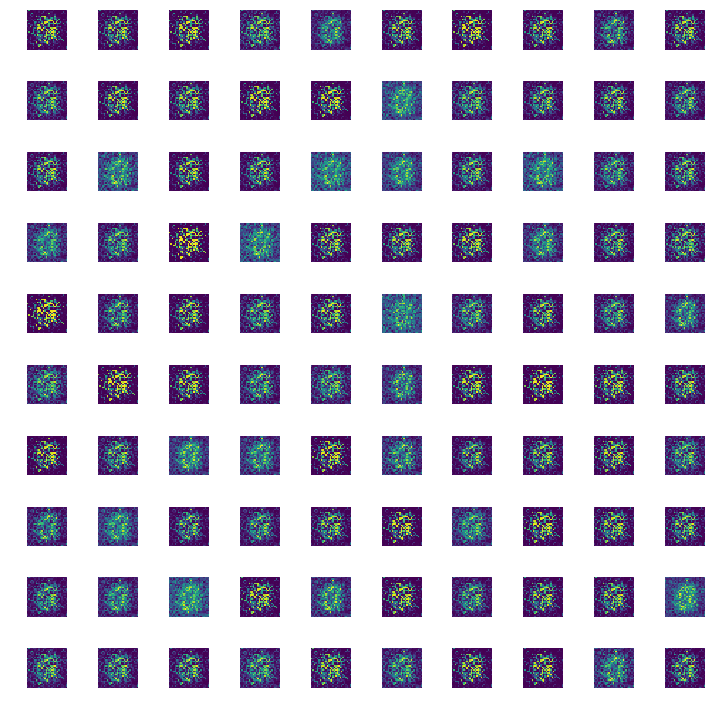

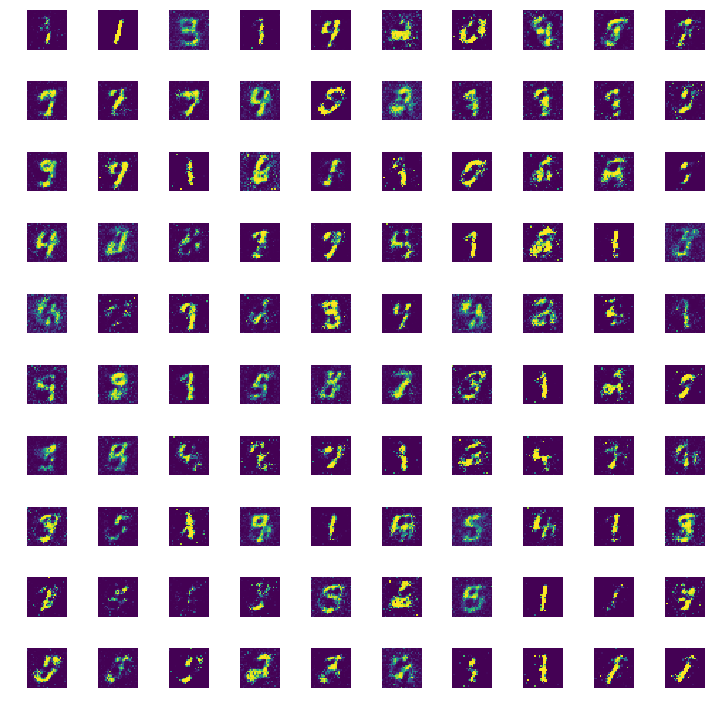

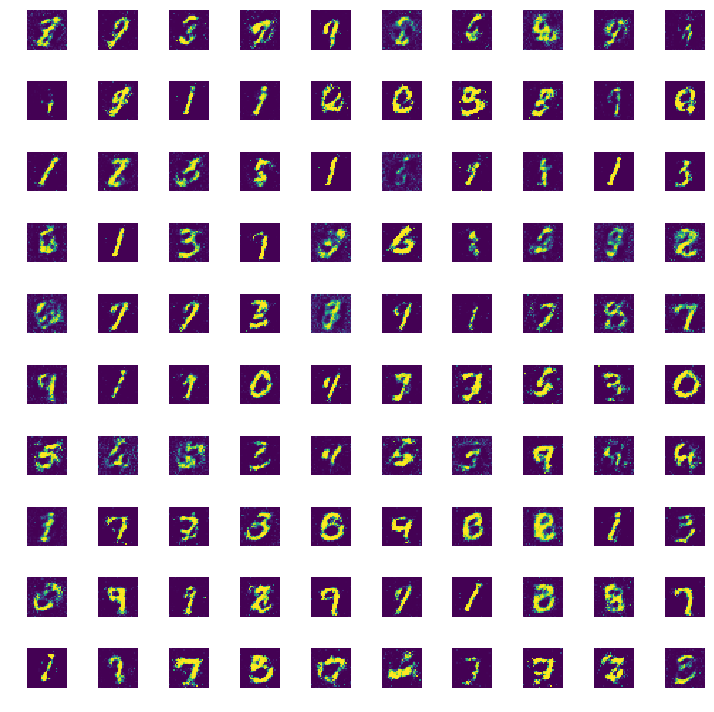

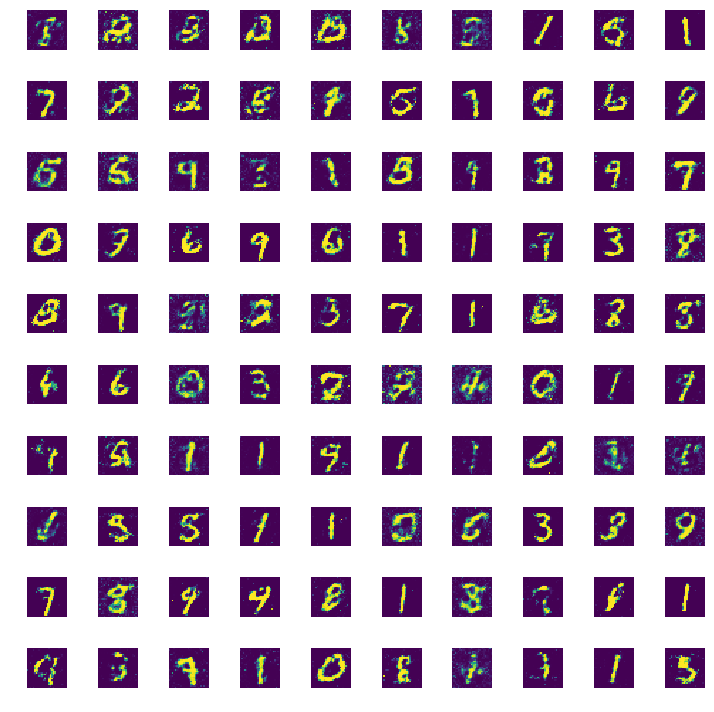

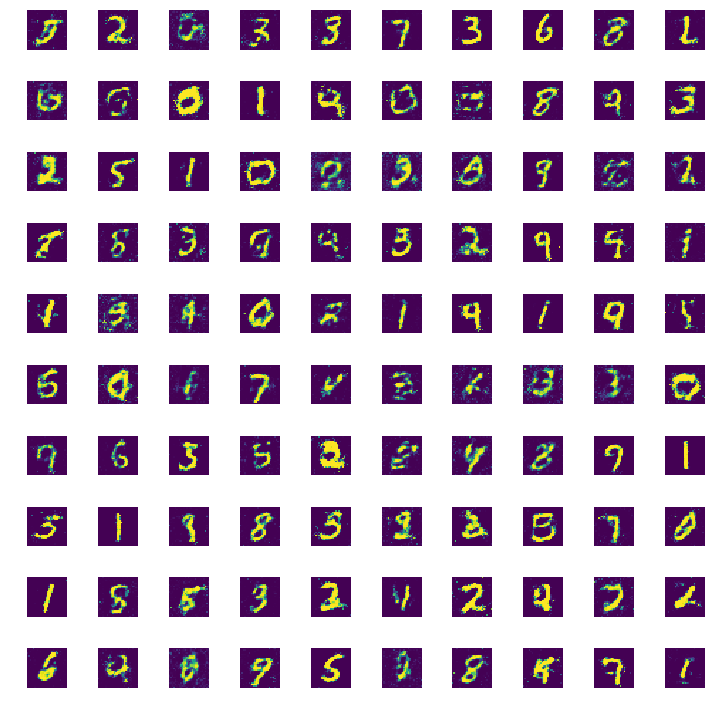

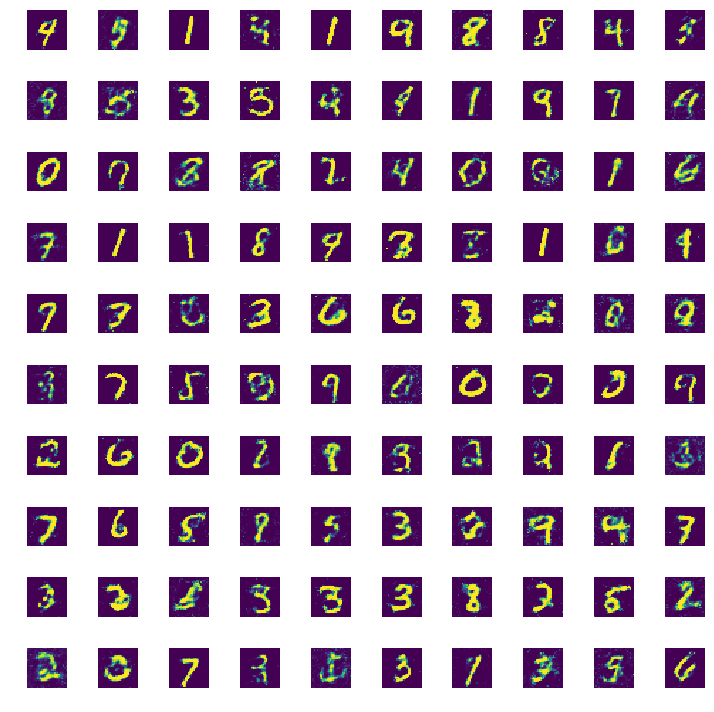

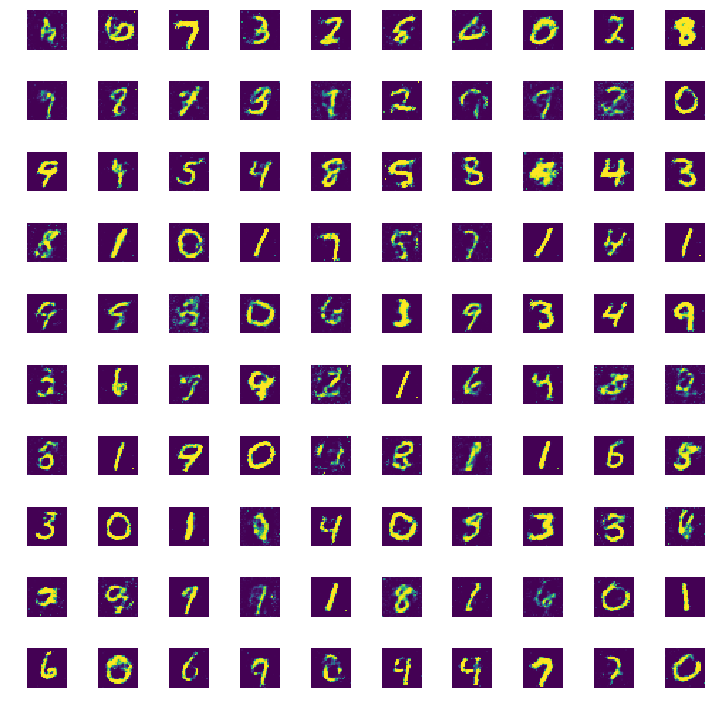

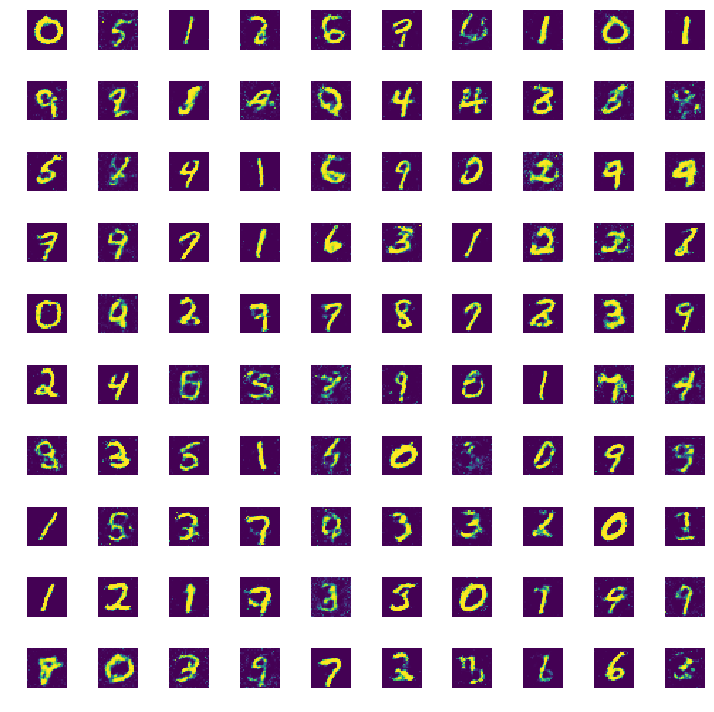

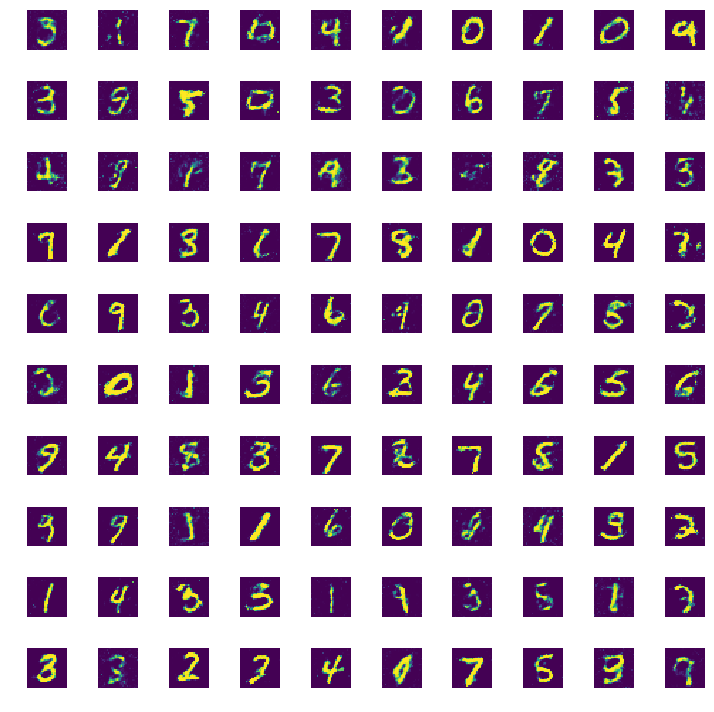

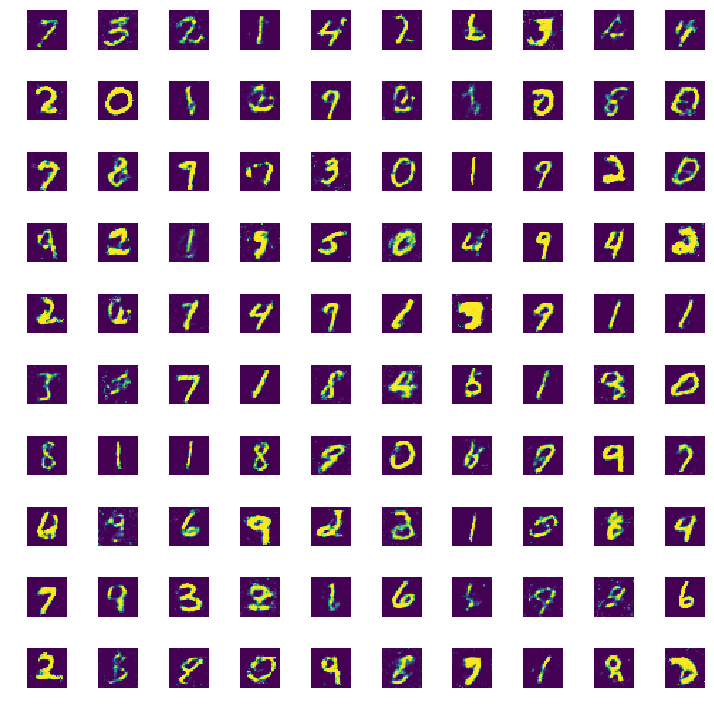

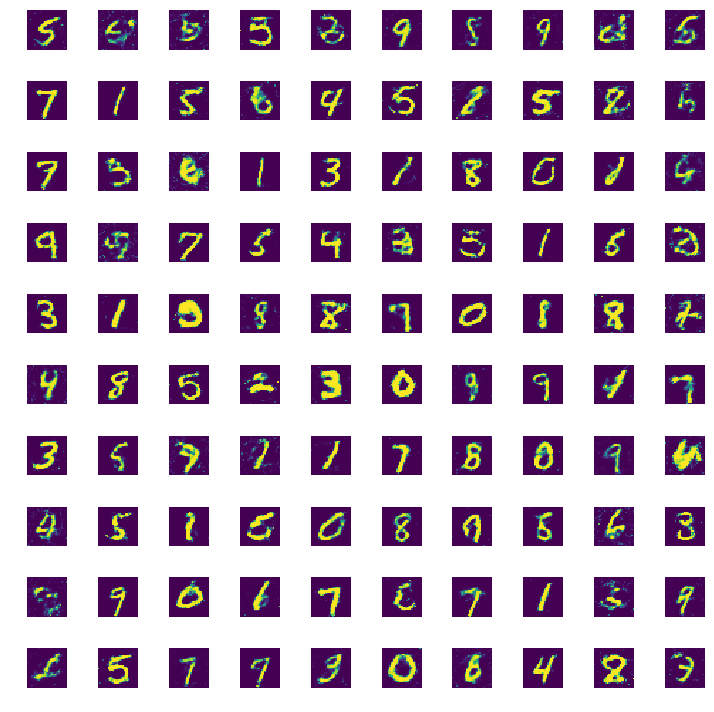

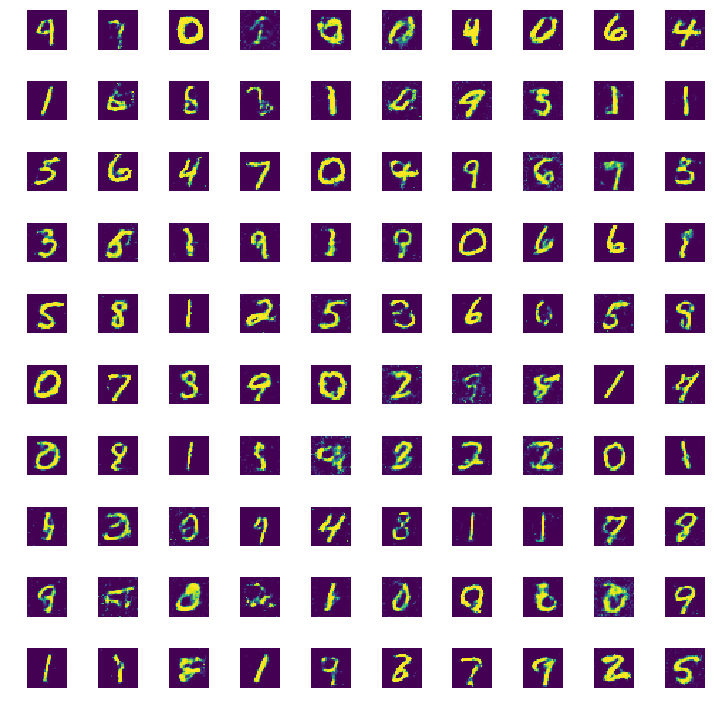

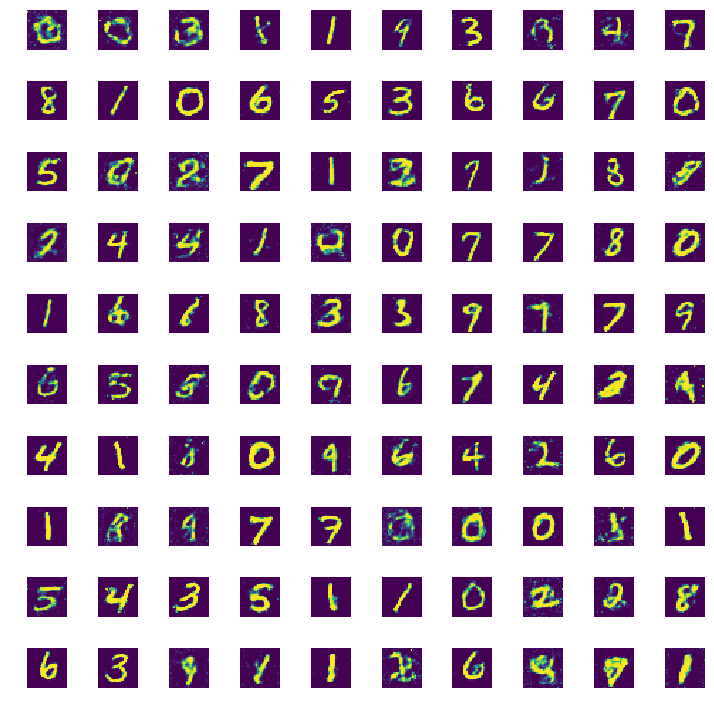

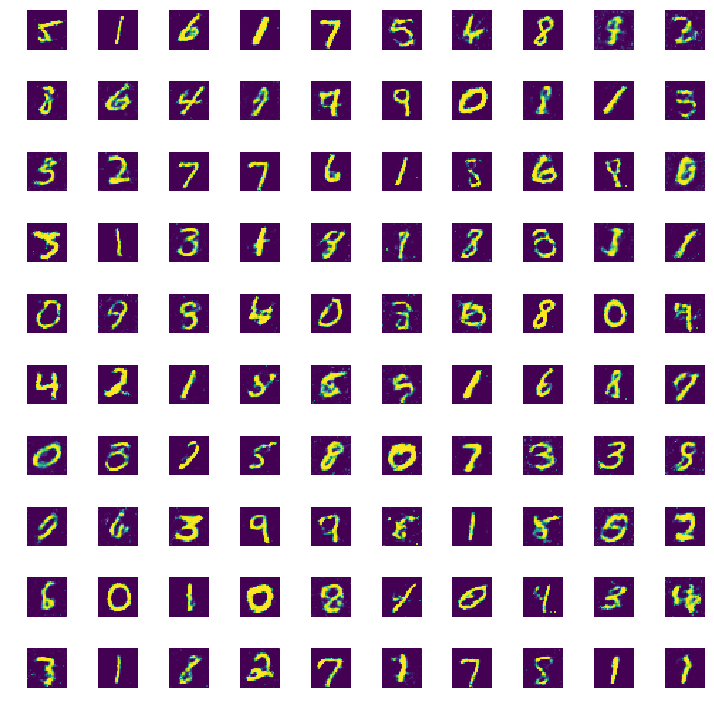

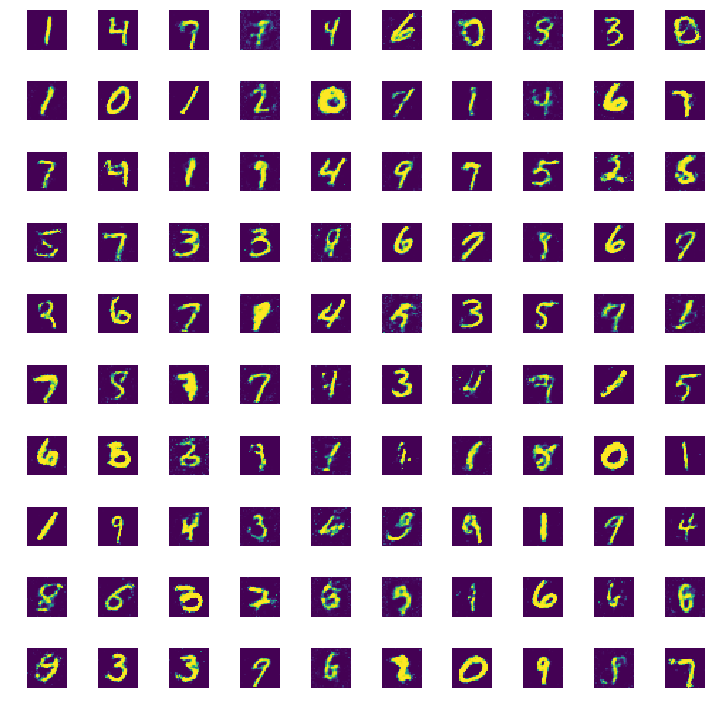

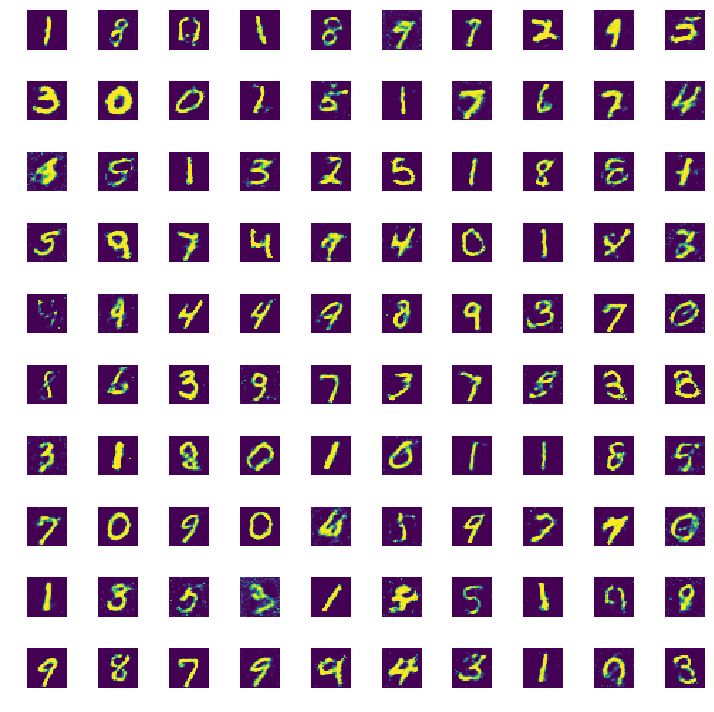

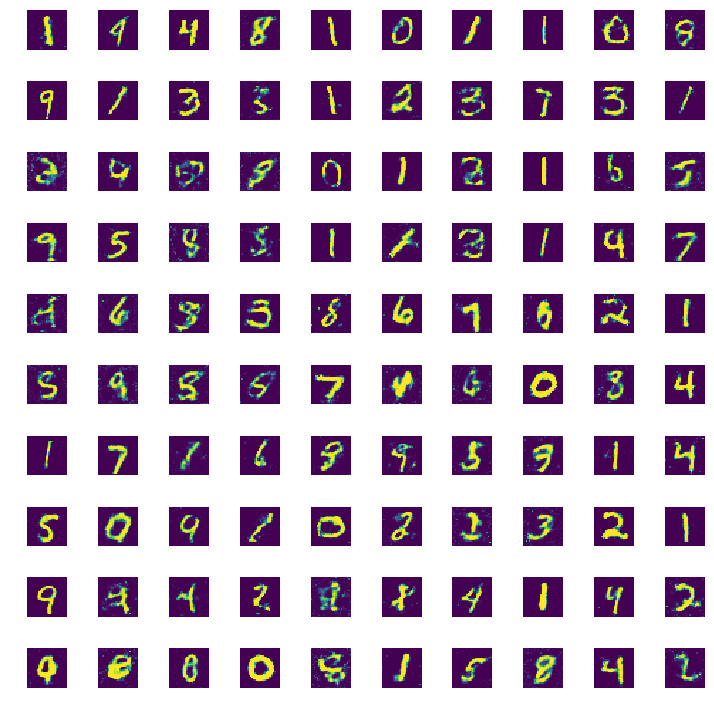

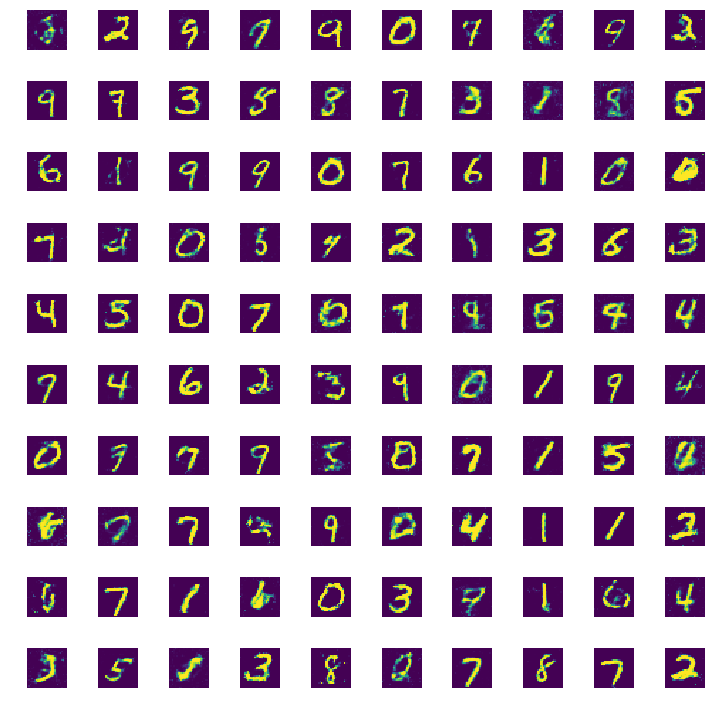

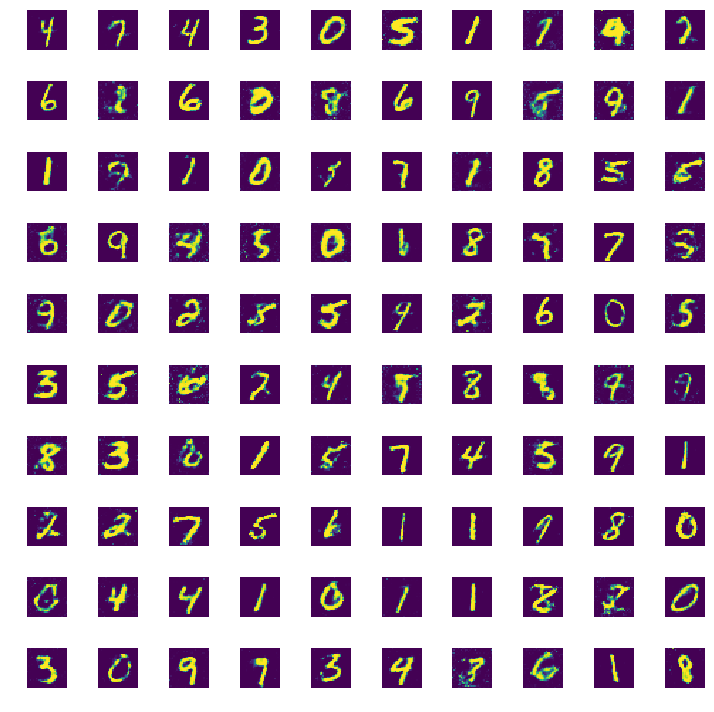

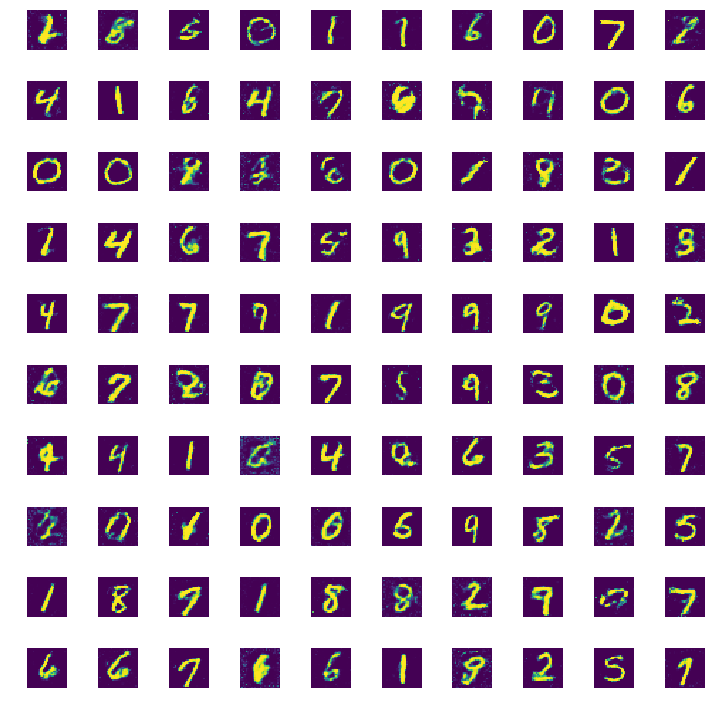

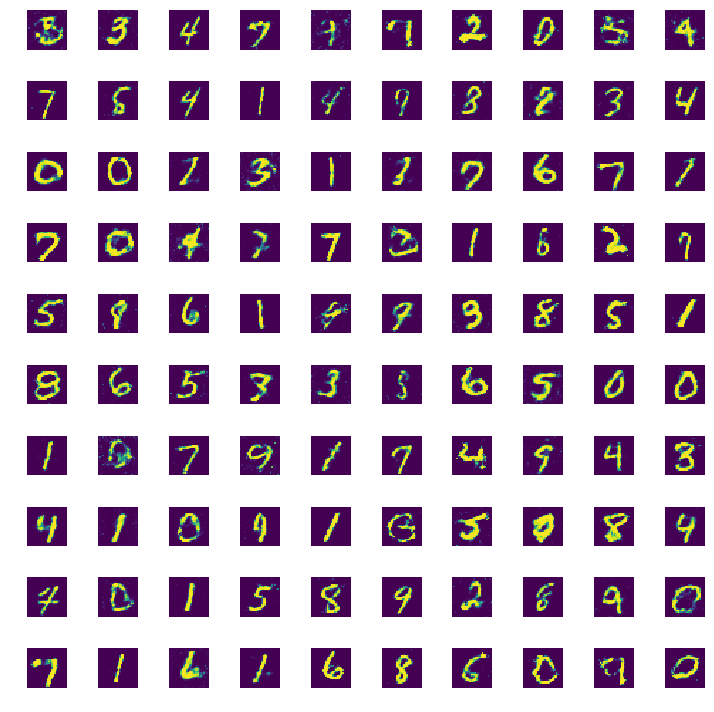

In [8]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(1000,128)


In [10]:
(X_train, y_train, X_test, y_test) = load_data()


In [11]:
generator= create_generator()
discriminator= create_discriminator()
gan = create_gan(discriminator, generator)


In [13]:
batch_size = 128
noise= np.random.normal(0,1, [batch_size, 100])


In [14]:
# Generate fake MNIST images from noised input
generated_images = generator.predict(noise)


In [15]:
image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
#Construct different mini-batches for real and fake, 
#each mini-batch needs to contain only all real images or all generated images
X= np.concatenate([image_batch, generated_images])


In [16]:
# Labels for generated and real data
y_dis=np.zeros(2*batch_size)
y_dis[:batch_size]=0.9


In [17]:
discriminator.trainable=True
discriminator.train_on_batch(X, y_dis)


0.6843665

In [18]:
noise= np.random.normal(0,1, [batch_size, 100])
y_gen = np.ones(batch_size)


In [19]:
discriminator.trainable=False
gan.train_on_batch(noise, y_gen)


0.71926343

In [20]:
if epochs == 1 or e % 20 == 0:
    plot_generated_images(e, generator)


NameError: name 'e' is not defined